In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from pylab import rcParams
rcParams['figure.figsize'] = 11,5
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import os

In [7]:
df = pd.read_csv(r'D:\Netology\Stat\water.csv')
df = df[ ['location', 'town', 'hardness', 'mortality'] ]
df

,location,town,hardness,mortality
0,South,Bath,105,1247
1,North,Birkenhead,17,1668
2,South,Birmingham,5,1466
3,North,Blackburn,14,1800
4,North,Blackpool,18,1609
...,...,...,...,...
56,South,Walsall,60,1527
57,South,West Bromwich,53,1627
58,South,West Ham,122,1486
59,South,Wolverhampton,81,1485


<AxesSubplot:title={'center':'Зависимость смертности от жесткости воды'}, xlabel='hardness', ylabel='mortality'>

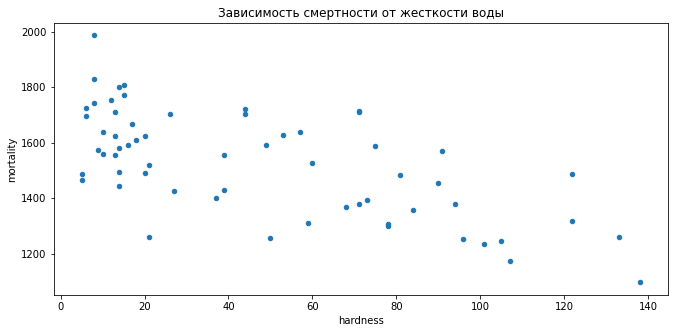

In [8]:
df.plot(kind='scatter', 
        x='hardness', 
        y='mortality', 
        title='Зависимость смертности от жесткости воды')

# Чем меньше степень жёсткости воды, тем больше смертность.

In [9]:
# коэффициент корреляции Пирсона
df[['hardness', 'mortality']].corr()

,hardness,mortality
hardness,1.000000,-0.654849
mortality,-0.654849,1.000000


In [10]:
# коэффициент корреляции Спирмена
df[['hardness', 'mortality']].corr(method='spearman')

,hardness,mortality
hardness,1.000000,-0.631665
mortality,-0.631665,1.000000


In [11]:
X = df[['hardness']]
y = df['mortality']

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [13]:
model = LinearRegression()
model.fit(X_train, y_train)  # обучение на данных и подбор оптимальных коэффициентов

LinearRegression()

In [14]:
model.coef_

array([-3.31576799])

In [15]:
model.intercept_

1678.9405326885008

In [16]:
y_pred = model.predict(X_test)
y_pred

array([1330.78489376, 1645.78285279, 1632.51978083, 1533.04674114,
       1420.31062948, 1612.62517289, 1237.94339004, 1430.25793345,
       1609.3094049 , 1659.04592475, 1483.31022129, 1410.36332551,
       1549.62558108, 1632.51978083, 1443.52100541, 1549.62558108])

In [17]:
# сравнение прогноза с фактом
res_df = X_test.copy()

res_df['y_pred'] = y_pred
res_df['y_test'] = y_test
res_df

,hardness,y_pred,y_test
0,105,1330.784894,1247
5,10,1645.782853,1558
46,14,1632.519781,1495
31,44,1533.046741,1702
13,78,1420.310629,1307
55,20,1612.625173,1625
34,133,1237.943390,1259
49,75,1430.257933,1587
12,21,1609.309405,1519
40,6,1659.045925,1696


In [18]:
# коэффициент детерминации
model.score(X_test, y_test)

0.410213439338294

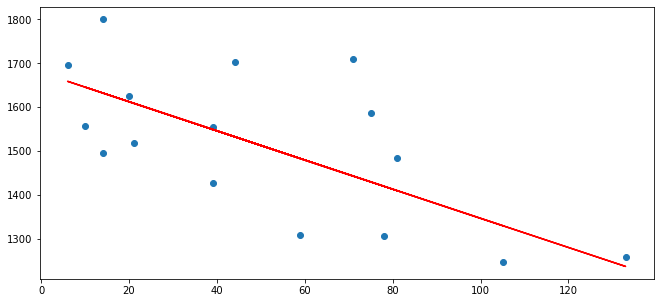

In [19]:
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, c='r')

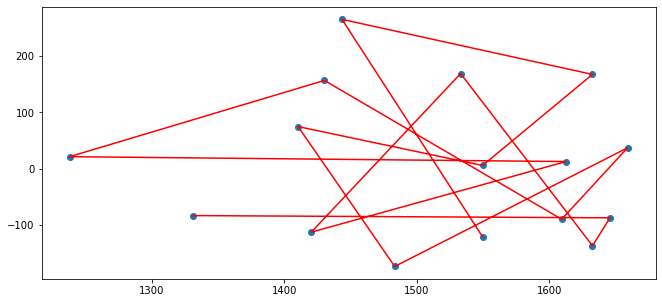

In [20]:
# график остатков
plt.scatter(y_pred, (y_test - y_pred))
plt.plot(y_pred, (y_test - y_pred), c='r')

# Зависимость смертности от жесткости воды наблюдается.

## Южные территории

In [21]:
south = df[df['location'] == 'South']
south.head()

,location,town,hardness,mortality
0,South,Bath,105,1247
2,South,Birmingham,5,1466
7,South,Bournemouth,78,1299
9,South,Brighton,84,1359
10,South,Bristol,73,1392


<AxesSubplot:title={'center':'Зависимость смертности от жесткости воды на юге'}, xlabel='hardness', ylabel='mortality'>

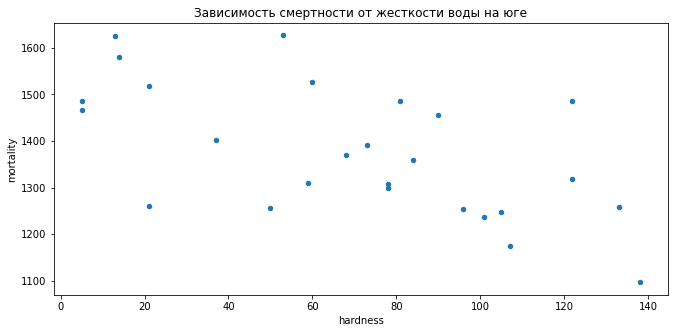

In [22]:
south.plot(kind='scatter', 
           x='hardness', 
           y='mortality', 
           title='Зависимость смертности от жесткости воды на юге')

## На графике зависимости смертности от жесткости воды на южной территории связь -  наблюдается, но распределение менее плотное, что связано с тем, что данные урезаны.

In [23]:
# коэффициент корреляции Пирсона
south[['hardness', 'mortality']].corr()

,hardness,mortality
hardness,1.000000,-0.602153
mortality,-0.602153,1.000000


In [24]:
# коэффициент корреляции Спирмена
south[['hardness', 'mortality']].corr(method='spearman')

,hardness,mortality
hardness,1.000000,-0.595723
mortality,-0.595723,1.000000


In [25]:
X = south[['hardness']]
y = south['mortality']

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [27]:
model = LinearRegression()
model.fit(X_train, y_train)  # обучается на данных и подбирает оптимальные коэффициенты

LinearRegression()

In [28]:
model.coef_

array([-3.07466127])

In [29]:
model.intercept_

1595.4337548999538

In [30]:
y_pred = model.predict(X_test)
y_pred

array([1220.32508018, 1580.06044856, 1272.59432174, 1220.32508018,
       1481.67128798, 1530.86586827])

In [31]:
# сравнение прогноза с фактом
res_south = X_test.copy()

res_south['y_pred'] = y_pred
res_south['y_test'] = y_test
res_south

,hardness,y_pred,y_test
18,122,1220.325080,1318
38,5,1580.060449,1486
0,105,1272.594322,1247
58,122,1220.325080,1486
27,37,1481.671288,1402
19,21,1530.865868,1260


In [32]:
# значение коэффициента детерминации
model.score(X_test, y_test)

-1.9300174406554644

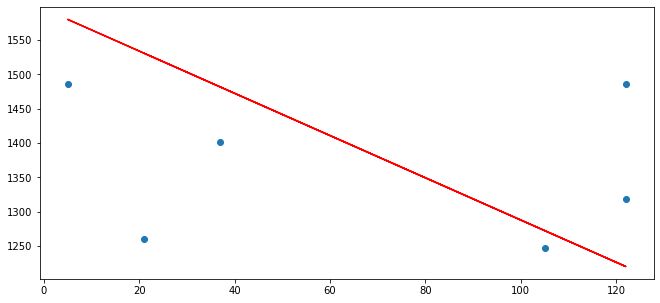

In [33]:
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, c='r')

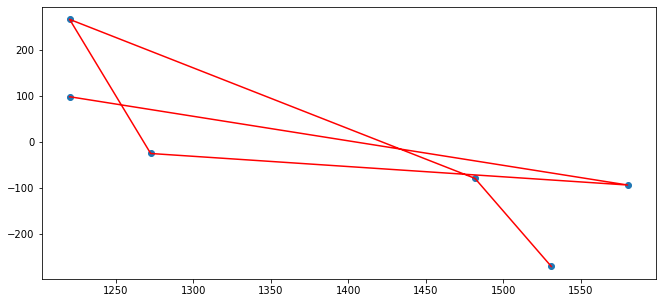

In [34]:
# график остатков
plt.scatter(y_pred, (y_test - y_pred))
plt.plot(y_pred, (y_test - y_pred), c='r')

## Северные территории

In [35]:
north = df[df['location'] == 'North']
north.head()

,location,town,hardness,mortality
1,North,Birkenhead,17,1668
3,North,Blackburn,14,1800
4,North,Blackpool,18,1609
5,North,Bolton,10,1558
6,North,Bootle,15,1807


<AxesSubplot:title={'center':'Зависимость смертности от жесткости воды на севере'}, xlabel='hardness', ylabel='mortality'>

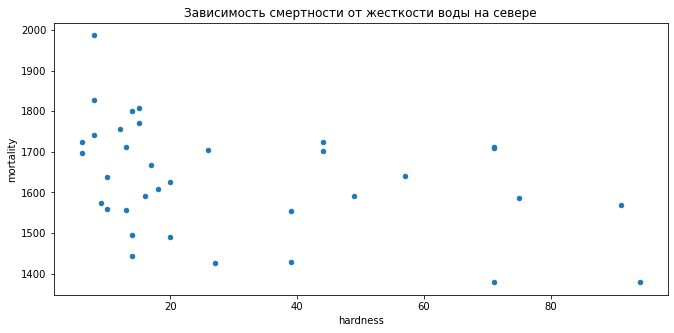

In [36]:
north.plot(kind='scatter', 
        x='hardness', 
        y='mortality', 
        title='Зависимость смертности от жесткости воды на севере')

In [37]:
# коэффициент корреляции Пирсона
north[['hardness', 'mortality']].corr()

,hardness,mortality
hardness,1.000000,-0.368598
mortality,-0.368598,1.000000


In [38]:
# коэффициент корреляции Спирмена
north[['hardness', 'mortality']].corr(method='spearman')

,hardness,mortality
hardness,1.000000,-0.404208
mortality,-0.404208,1.000000


In [39]:
X = north[['hardness']]
y = north['mortality']

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [41]:
model = LinearRegression()
model.fit(X_train, y_train)  # обучается на данных и подбирает оптимальные коэффициенты

LinearRegression()

In [42]:
model.coef_

array([-2.25038888])

In [43]:
model.intercept_

1694.905301402942

In [44]:
y_pred = model.predict(X_test)
y_pred

array([1676.90219034, 1674.65180145, 1663.39985704, 1681.4029681 ,
       1658.89907927, 1535.1276907 , 1595.88819055])

In [45]:
# сравнение прогноза с фактом
res_north = X_test.copy()

res_north['y_pred'] = y_pred
res_north['y_test'] = y_test
res_north

,hardness,y_pred,y_test
45,8,1676.902190,1987
23,9,1674.651801,1574
43,14,1663.399857,1444
36,6,1681.402968,1724
26,16,1658.899079,1591
50,71,1535.127691,1713
31,44,1595.888191,1702


In [46]:
# значение коэффициента детерминации
model.score(X_test, y_test)

-0.18101539518829401

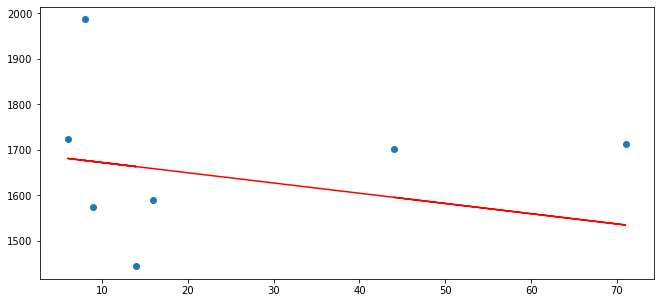

In [47]:
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, c='r')

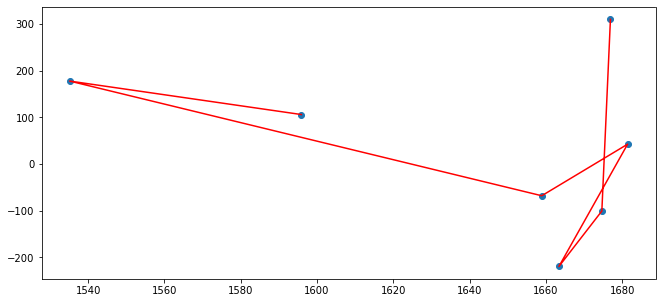

In [48]:
# график остатков
plt.scatter(y_pred, (y_test - y_pred))
plt.plot(y_pred, (y_test - y_pred), c='r')

## В разделенных данных, на юг и север, наблюдается меньшая плотность распределения величин, коэфф-ты корреляции уменьшились, значения коэфф-в детерминации стали с отрицательными значениями, соответственно и качество моделей ухудшилось (по сравнению с моделью, до разбивки).

<AxesSubplot:title={'center':'Зависимость смертности от жесткости воды на севере'}, xlabel='hardness', ylabel='mortality'>

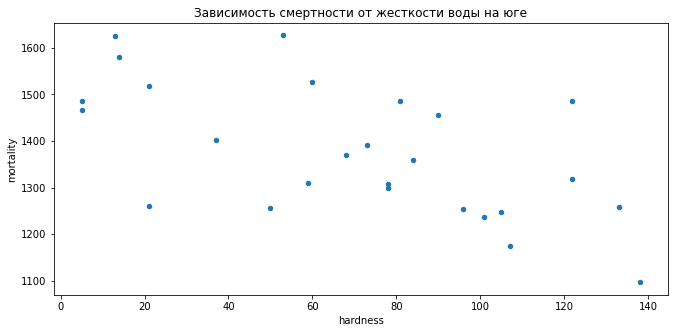

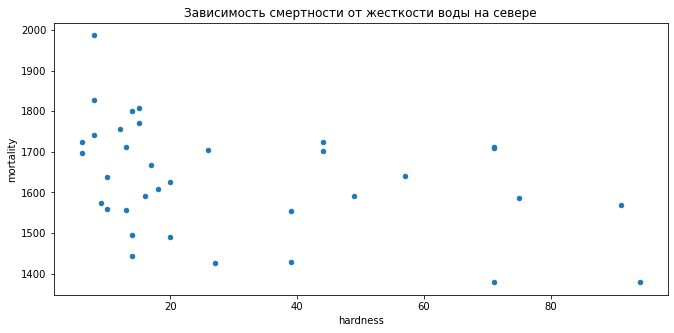

In [49]:
south.plot(kind='scatter', 
           x='hardness', 
           y='mortality', 
           title='Зависимость смертности от жесткости воды на юге')
north.plot(kind='scatter', 
        x='hardness', 
        y='mortality', 
        title='Зависимость смертности от жесткости воды на севере')

## Сравнивая графики построенные на данных после разделения на север и юг видно, что на графике южной территории данные распределены равномерно, а на севере наблюдается более плотное распределение данных с меньшей жескостью воды и большей смертностью. Соответственно, можно сказать, что на севере больше локаций с маленькой степенью жесткости воды.